In [2]:
import pandas as pd

file_path = '/content/twitter_training.csv'

# Read the file in chunks
chunks = pd.read_csv(file_path, chunksize=10000, on_bad_lines='skip')

# Concatenate chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)

# Display the first few rows of the dataset and general information
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53826 entries, 0 to 53825
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   53826 non-null  int64 
 1   Borderlands                                            53826 non-null  object
 2   Positive                                               53826 non-null  object
 3   im getting on borderlands and i will murder you all ,  53334 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


In [4]:
df.shape

(53826, 4)

In [5]:
# Rename columns for better understanding
df.columns = ['ID', 'Category', 'Sentiment', 'Tweet']
# Handle missing values in the 'Tweet' column
df['Tweet'].fillna('', inplace=True)

# Save the preprocessed dataframe to a new CSV file
preprocessed_file_path = '/content/twitter_training_preprocessed.csv'
df.to_csv(preprocessed_file_path, index=False)

# Display the first few rows of the preprocessed dataframe
df.head()


,ID,Category,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
df.isnull().sum()

ID           0
Category     0
Sentiment    0
Tweet        0
dtype: int64

In [7]:
df.shape

(53826, 4)

In [9]:
import string
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import nltk

# Ensure the necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
file_path = '/content/twitter_training_preprocessed.csv'
df = pd.read_csv(file_path)

# 1. Removing Duplicates
df.drop_duplicates(inplace=True)

# Ensure 'Tweet' column contains only strings
df['Tweet'] = df['Tweet'].astype(str)

# 2. Lowercasing
df['Tweet'] = df['Tweet'].str.lower()

# 3. Removing Punctuation
df['Tweet'] = df['Tweet'].str.translate(str.maketrans('', '', string.punctuation))

# 4. Tokenization
df['Tweet'] = df['Tweet'].apply(word_tokenize)

# 5. Removing Stop Words
stop_words = set(stopwords.words('english'))
df['Tweet'] = df['Tweet'].apply(lambda x: [word for word in x if word not in stop_words])

# 6. Stemming
ps = PorterStemmer()
df['Tweet'] = df['Tweet'].apply(lambda x: [ps.stem(word) for word in x])

# Convert tokenized words back to sentences
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join(x))

# 7. Encoding Categorical Data
label_encoder_category = LabelEncoder()
label_encoder_sentiment = LabelEncoder()

df['Category'] = label_encoder_category.fit_transform(df['Category'])
df['Sentiment'] = label_encoder_sentiment.fit_transform(df['Sentiment'])

# 8. Vectorizing the text data with reduced dimensions
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['Tweet'])

# Combine with other features, keeping the sparse format
X_other = df[['ID', 'Category']].to_numpy()
X_combined = np.hstack((X_other, X_tfidf.toarray()))

# Handling Imbalanced Data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_combined, df['Sentiment'])

# Create a new DataFrame with resampled data
resampled_df = pd.DataFrame(X_resampled, columns=['ID', 'Category'] + list(vectorizer.get_feature_names_out()))
resampled_df['Sentiment'] = y_resampled

# Save the preprocessed and resampled dataframe to a new CSV file
preprocessed_resampled_file_path = '/content/twitter_training_preprocessed_resampled.csv'
resampled_df.to_csv(preprocessed_resampled_file_path, index=False)

# Display the first few rows of the final preprocessed and resampled dataframe
resampled_df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,ID,Category,00,000,01,02,03,04,05,06,...,zer0,zero,zion,zip,zoe,zombi,zone,zonestreamcx,zoom,Sentiment
0,2401.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,2401.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,2401.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2401.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,2401.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [11]:
df.columns

Index(['ID', 'Category', '00', '000', '01', '02', '03', '04', '05', '06',
       ...
       'zer0', 'zero', 'zion', 'zip', 'zoe', 'zombi', 'zone', 'zonestreamcx',
       'zoom', 'Sentiment'],
      dtype='object', length=5003)

# Analysis and Visualization.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


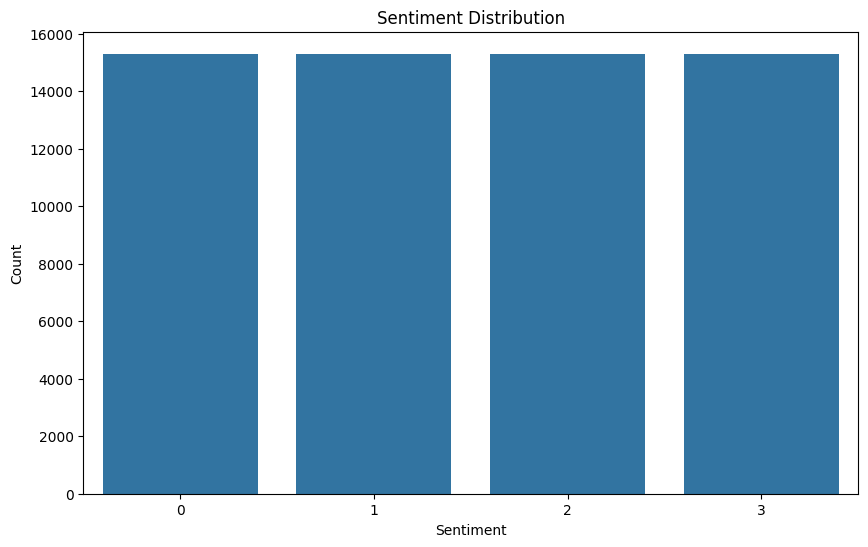

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import nltk

# Ensure the necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset in chunks
file_path = '/content/twitter_training_preprocessed_resampled.csv'
chunksize = 10000
chunks = pd.read_csv(file_path, chunksize=chunksize)

# Concatenate chunks into a single DataFrame for analysis
df_list = []
for chunk in chunks:
    df_list.append(chunk)
df = pd.concat(df_list, ignore_index=True)

# Analyze the data
# Distribution of sentiments
sentiment_distribution = df['Sentiment'].value_counts()

# Frequency of categories
category_distribution = df['Category'].value_counts()

# Relationship between categories and sentiments
category_sentiment_distribution = df.groupby(['Category', 'Sentiment']).size().unstack(fill_value=0)

# Visualize the results
# Bar Chart: Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

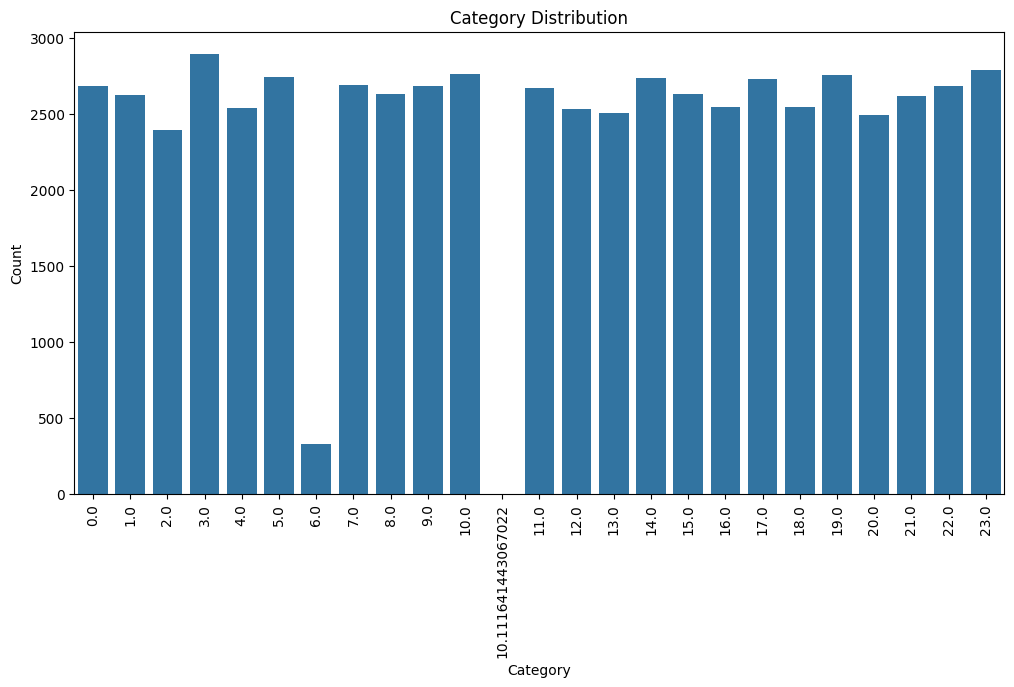

In [8]:
# Bar Chart: Category Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

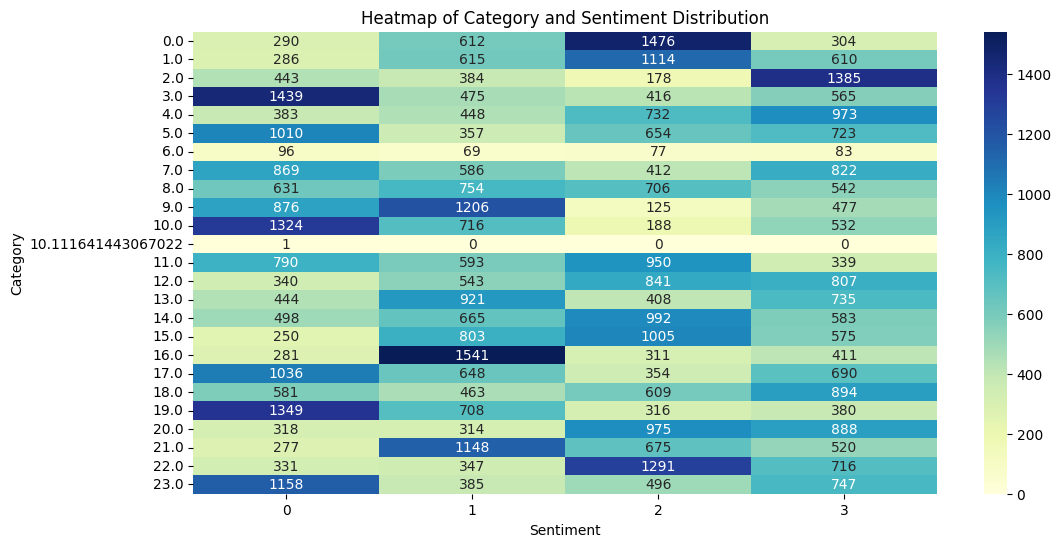

In [9]:
# Heatmap: Category and Sentiment Distribution
plt.figure(figsize=(12, 6))
sns.heatmap(category_sentiment_distribution, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Heatmap of Category and Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Category')
plt.show()

In [10]:
# Display results of analysis
print("Sentiment Distribution:\n", sentiment_distribution)
print("Category Distribution:\n", category_distribution)
print("Category-Sentiment Distribution:\n", category_sentiment_distribution)

Sentiment Distribution:
 Sentiment
3    15301
2    15301
1    15301
0    15301
Name: count, dtype: int64
Category Distribution:
 Category
3.000000     2895
23.000000    2786
10.000000    2760
19.000000    2753
5.000000     2744
14.000000    2738
17.000000    2728
7.000000     2689
22.000000    2685
9.000000     2684
0.000000     2682
11.000000    2672
8.000000     2633
15.000000    2633
1.000000     2625
21.000000    2620
18.000000    2547
16.000000    2544
4.000000     2536
12.000000    2531
13.000000    2508
20.000000    2495
2.000000     2390
6.000000      325
10.111641       1
Name: count, dtype: int64
Category-Sentiment Distribution:
 Sentiment     0     1     2     3
Category                         
0.000000    290   612  1476   304
1.000000    286   615  1114   610
2.000000    443   384   178  1385
3.000000   1439   475   416   565
4.000000    383   448   732   973
5.000000   1010   357   654   723
6.000000     96    69    77    83
7.000000    869   586   412   822
8.000000    

# Identify Common Words in Positive and Negative Tweets

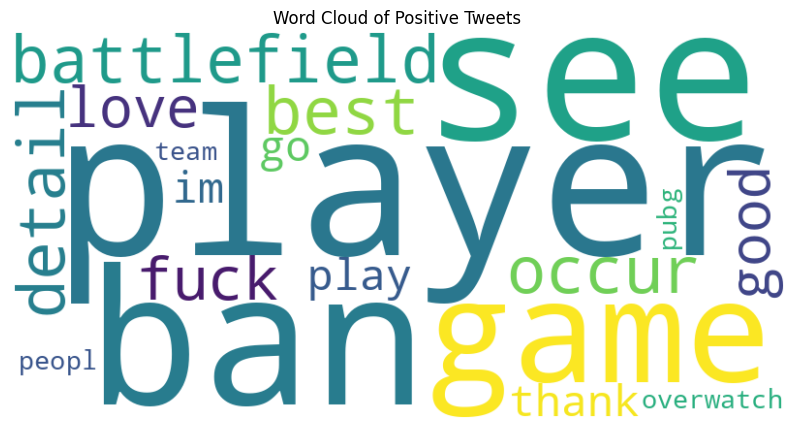

In [14]:
# Extract the TF-IDF feature columns
tfidf_columns = df.columns.difference(['ID', 'Category', 'Sentiment'])

# Separate positive and negative tweets
positive_tweets = df[df['Sentiment'] == 1][tfidf_columns]
negative_tweets = df[df['Sentiment'] == 0][tfidf_columns]

# Aggregate the words for word cloud generation
positive_text = ' '.join(positive_tweets.columns[positive_tweets.sum(axis=0).argsort()[::-1][:20]])
negative_text = ' '.join(negative_tweets.columns[negative_tweets.sum(axis=0).argsort()[::-1][:20]])

# Create word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Word Cloud: Positive Tweets
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Positive Tweets')
plt.axis('off')
plt.show()

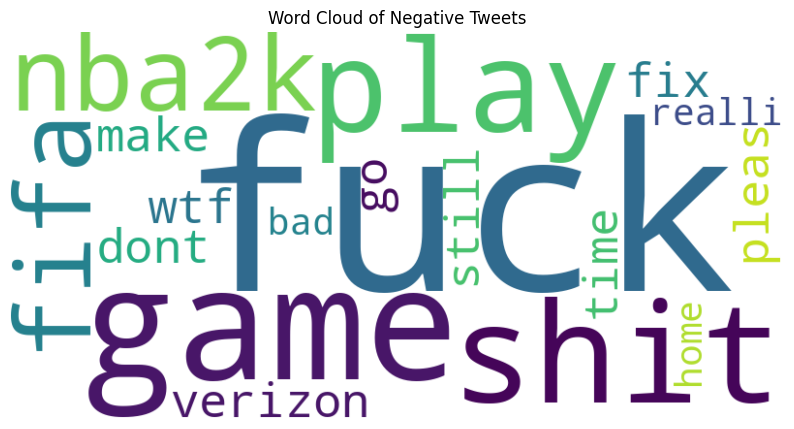

In [15]:
# Word Cloud: Negative Tweets
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Negative Tweets')
plt.axis('off')
plt.show()